# Predictive Coding Simulation: A Minimal Neural Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simulate Sensory Input

In [2]:
t = np.linspace(0, 10, 1000) # add time points -> 10 seconds, 1000 samples

In [5]:
# simulate a smooth sensory signal (e.g., a sine wave with noise)
true_signal = np.sin(2 * np.pi * t) + 0.3 * np.random.randn(len(t))

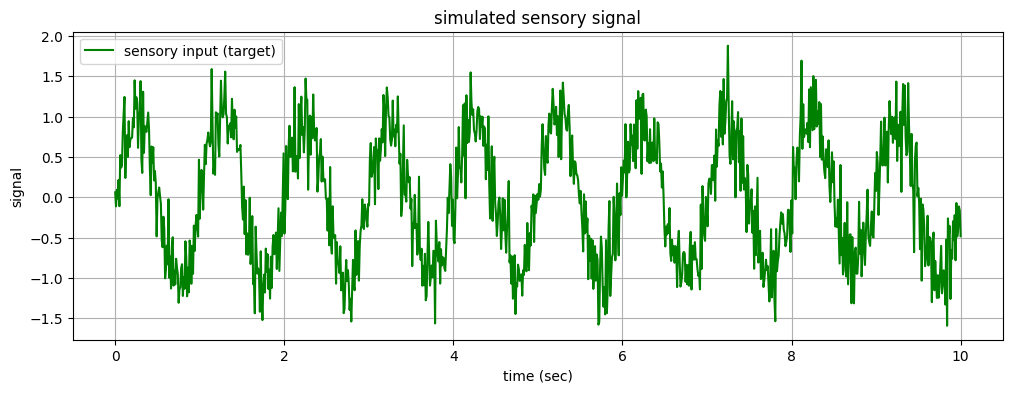

In [10]:
# plot the signal
plt.figure(figsize=(12, 4))
plt.plot(t, true_signal, label='sensory input (target)', c="green")
plt.title('simulated sensory signal')
plt.xlabel('time (sec)')
plt.ylabel('signal')
plt.legend()
plt.grid(True)
plt.show()

this is the signal that the predictive layer will try to anticipate. (target signal.)
like “noisy visual input” or “auditory pattern” -> anything the brain might try to make sense of.

## Build the Predictive Layer.

In [11]:
# Initialize prediction vector (starts at 0)
predicted_signal = np.zeros_like(true_signal)

# Parameters
learning_rate = 0.01
n_steps = len(true_signal)

# Iteratively update predictions based on error
for t_step in range(1, n_steps):
    # Get prediction from previous time step
    prediction = predicted_signal[t_step - 1]

    # Compute prediction error (target - prediction)
    error = true_signal[t_step - 1] - prediction

    # Update prediction: reduce error using a simple rule
    predicted_signal[t_step] = prediction + learning_rate * error


here is a very simple “1-layer brain” trying to (i) predict the next point using the last one and (ii) learn from the prediction error, (iii) slowly minimize surprise.
later also adding layers or feedback. this is basic form to show key predictive coding principles.

## Visualize the Prediction

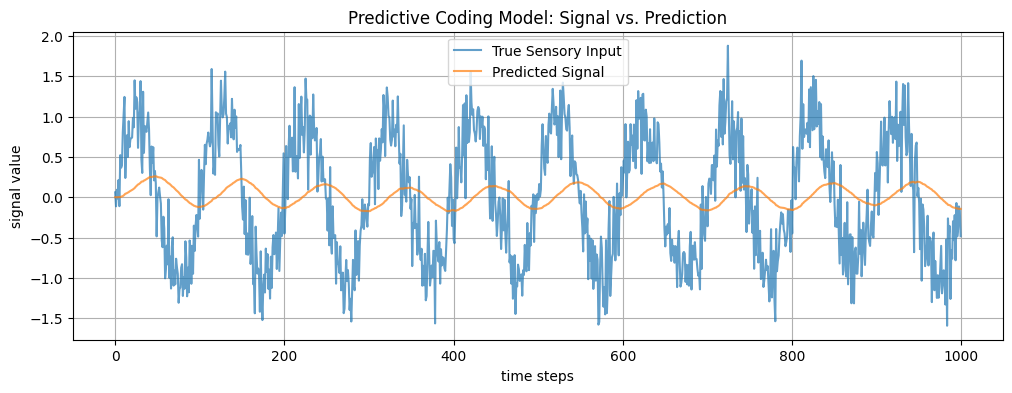

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(true_signal, label='True Sensory Input', alpha=0.7)
plt.plot(predicted_signal, label='Predicted Signal', alpha=0.7)
plt.title('Predictive Coding Model: Signal vs. Prediction')
plt.xlabel('time steps')
plt.ylabel('signal value')
plt.legend()
plt.grid(True)
plt.show()


## Prediction Error Over Time

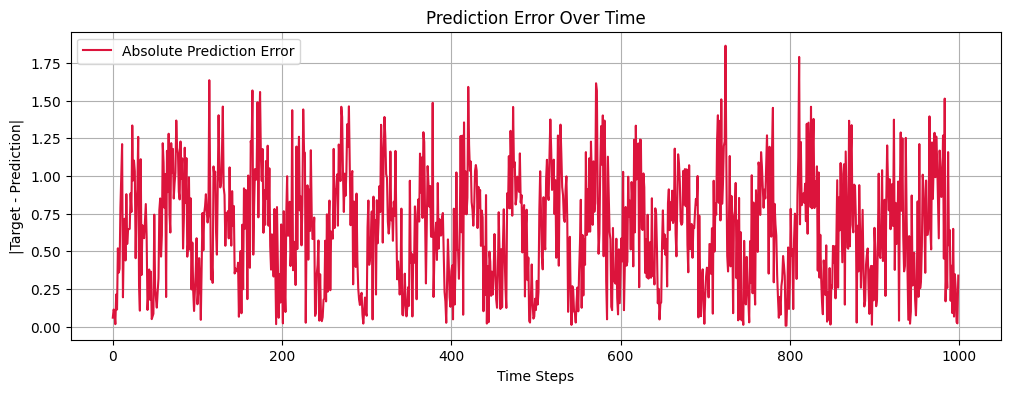

In [14]:
# compute error at each time step
prediction_error = np.abs(true_signal - predicted_signal)

# plot error over time
plt.figure(figsize=(12, 4))
plt.plot(prediction_error, label='Absolute Prediction Error', color='crimson')
plt.title('Prediction Error Over Time')
plt.xlabel('Time Steps')
plt.ylabel('|Target - Prediction|')
plt.legend()
plt.grid(True)
plt.show()


## two layers

In [15]:
t = np.linspace(0, 10, 1000)
true_signal = np.sin(2 * np.pi * 1 * t) + 0.3 * np.random.randn(len(t))

pred_layer1 = np.zeros_like(true_signal)  # predicts sensory input
pred_layer2 = np.zeros_like(true_signal)  # predicts layer 1

lr1 = 0.05   # learns from sensory input
lr2 = 0.01   # learns from layer 1

for t_step in range(1, len(t)):
    # === layer 1 ===
    error1 = true_signal[t_step - 1] - pred_layer1[t_step - 1]
    pred_layer1[t_step] = pred_layer1[t_step - 1] + lr1 * error1

    # === layer 2 ===
    error2 = pred_layer1[t_step - 1] - pred_layer2[t_step - 1]
    pred_layer2[t_step] = pred_layer2[t_step - 1] + lr2 * error2

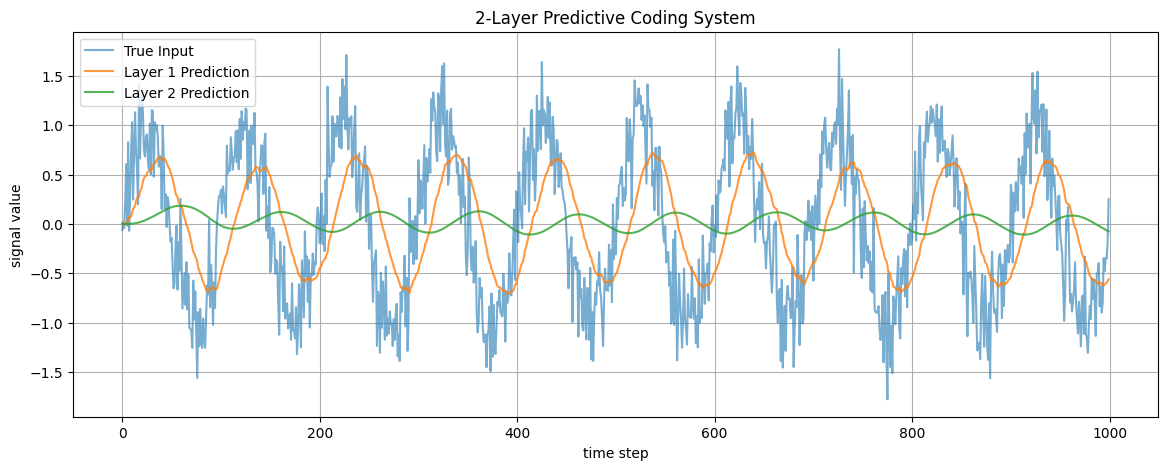

In [16]:
plt.figure(figsize=(14, 5))
plt.plot(true_signal, label="True Input", alpha=0.6)
plt.plot(pred_layer1, label="Layer 1 Prediction", alpha=0.8)
plt.plot(pred_layer2, label="Layer 2 Prediction", alpha=0.8)
plt.title("2-Layer Predictive Coding System")
plt.xlabel("time step")
plt.ylabel("signal value")
plt.legend()
plt.grid(True)
plt.show()


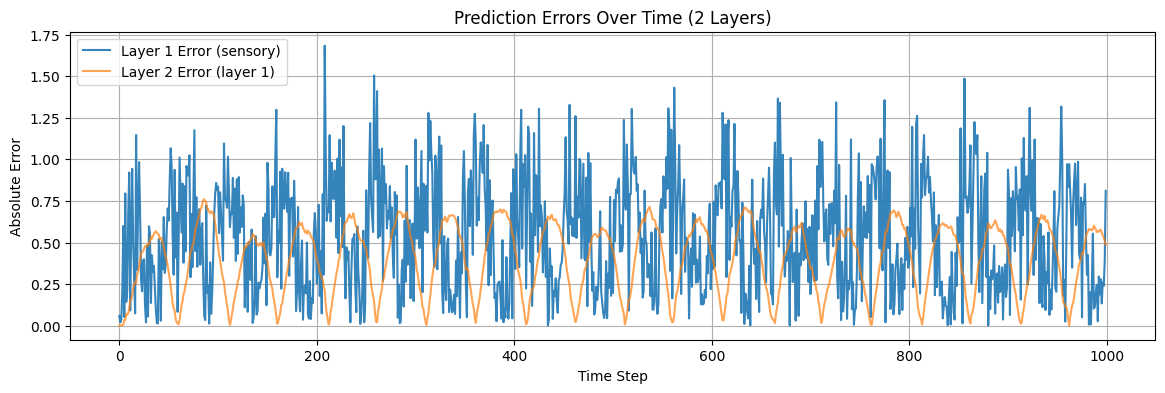

In [17]:
error1_series = np.abs(true_signal - pred_layer1)
error2_series = np.abs(pred_layer1 - pred_layer2)

plt.figure(figsize=(14, 4))
plt.plot(error1_series, label="Layer 1 Error (sensory)", alpha=0.9)
plt.plot(error2_series, label="Layer 2 Error (layer 1)", alpha=0.7)
plt.title("Prediction Errors Over Time (2 Layers)")
plt.xlabel("Time Step")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True)
plt.show()

This model simulates a simple predictive coding system and includes two layers:
- **Layer 1** tries to predict a noisy sensory signal over time.
- **Layer 2** tries to predict Layer 1’s internal predictions.

Both layers learn using prediction error:
- Each time step, the model compares its prediction to the actual signal (or the prediction below it).
- It updates its prediction to reduce future error, mimicking how the brain learns by minimizing surprise.

-> this was simulated using a noisy sine wave and update predictions using basic rules (like a simplified neural network).

-> the plots show how the predictions gradually get closer to the actual signal, and how the prediction error decreases over time.

-> this is a demo to build intuition for how hierarchical prediction might work.
